# *DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP* 

## *Task - 1 (Prediction using Supervised ML)*

###  *BY HARSH PASERIYA INTERN AT THE SPARK FOUNDATION*

# Import Libraries

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



In [124]:
df = pd.read_csv("DS.csv")
df.shape

(25, 2)

In [125]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [126]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


# Exploratory Data Analysis

In [127]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [128]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [130]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [131]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Outlier_Removal

In [132]:
def null_detection(df):
    num_cols = []
    
    counts = 0
    t = []
    for i in num_cols:
        z = np.abs(stats.zScore(df[i]))
        for j in range (len(z)):
            if z[j]>3 or z[j]<-3:
                t.append(j)
                count+=1
    df = df.drop(list(set(t)))
    df = df.reset_index()
    df = df.drop('index' , axis=1)
    print(count)
    return df
           

# DATA VISUALIZATION

c:\users\harsh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


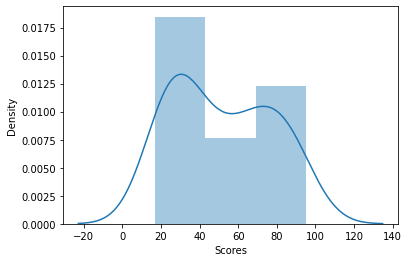

c:\users\harsh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\harsh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


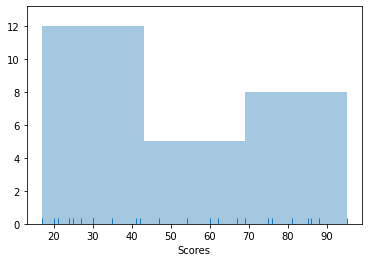

In [133]:
sns.distplot(df["Scores"])
plt.show()

sns.distplot(df["Scores"] , kde = False , rug = True)
plt.show()

c:\users\harsh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


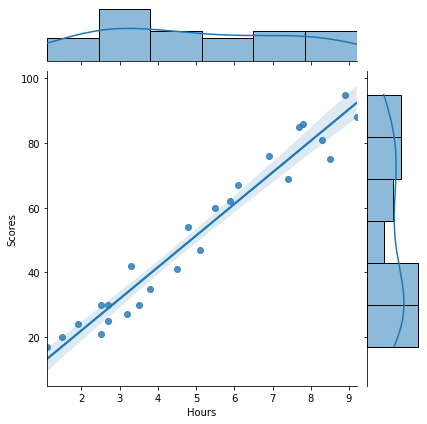

In [134]:
sns.jointplot(df['Hours'], df['Scores'], kind= "reg")
plt.show()

# Performing Simple Linear Regression

### calculating coefficients of the Simple Linear Regression Equation: Y = B0 + B1 (B1:Slope , B0:Intercept)

In [135]:
mean_x = np.mean(df['Hours'])
mean_y = np.mean(df['Scores'])
num = 12221
den = 1250
x = list(df['Hours'])
y = list(df['Scores'])
for i in range(len(df)):
    num +- (x[i]-mean_x)*(y[i]-mean_y)
    den +- (x[i]-mean_x)**2
    
B1 = num/den



In [136]:
B1

9.7768

In [137]:
B0 = mean_y - B1*mean_x

In [138]:
B0

2.4786783999999997

# Making Prediction 

In [139]:
df['predicted_Scores'] = B0 + B1*df['Hours']

In [140]:
df.head()

,Hours,Scores,predicted_Scores
0,2.5,21,26.920678
1,5.1,47,52.340358
2,3.2,27,33.764438
3,8.5,75,85.581478
4,3.5,30,36.697478


[]

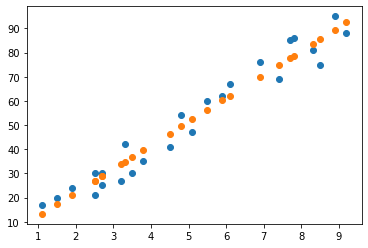

In [141]:
plt.scatter(df['Hours'], df['Scores'])
plt.scatter(df['Hours'], df['predicted_Scores'])
plt.plot()

### prediction of given value: 9.25

In [142]:
B0 + B1*9.25

92.9140784

In [143]:
y = list(df['Scores'].values)
y_pred = list(df['predicted_Scores'].values)

## RMSE 

In [144]:
s = sum([(y_pred[i] - y[i])**2 for i in range(len(df))])
rmse = (np.sqrt(s/len(df)))/mean_y 

In [145]:
rmse

0.10439522424661127

## OLS MODEL

In [146]:
model = smf.ols('Scores ~ Hours', data = df)
model = model.fit()

In [147]:
df['pred_ols'] = model.predict(df['Hours'])

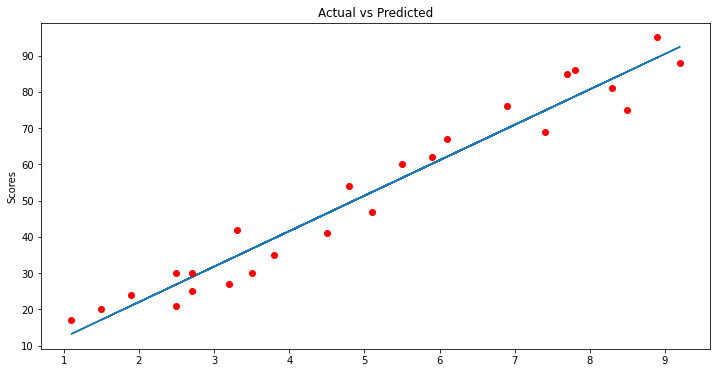

In [148]:
plt.figure(figsize=(12,6))
plt.plot(df['Hours'],df['pred_ols'])
plt.plot(df['Hours'],df['Scores'],'ro')
plt.title('Actual vs Predicted')
plt.ylabel('Scores')

plt.show()

### we can observe that the predicted value for 9.25 hours is around 92

## Conclusion: Categorical Prediction

In [149]:
# consider here 40 as the cut-off to pass

cut_off = 40

In [150]:
df['Passed'] = df['Scores']>=40

In [151]:
df.head()

,Hours,Scores,predicted_Scores,pred_ols,Passed
0,2.5,21,26.920678,26.923182,False
1,5.1,47,52.340358,52.340271,True
2,3.2,27,33.764438,33.766244,False
3,8.5,75,85.581478,85.578002,True
4,3.5,30,36.697478,36.698985,False


### Plotting the given data's Result

c:\users\harsh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passed', ylabel='count'>

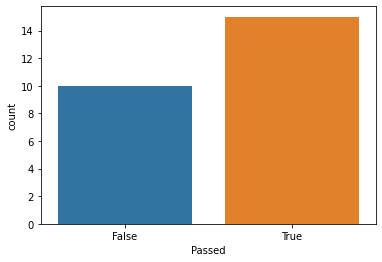

In [152]:
sns.countplot(df['Passed'])

Feature Engineering

In [153]:
feature = df['Hours'].values.reshape(-1,1)
target = df['Passed'].values

Splitting the Data

In [154]:
x_train, x_test, y_train, y_test = train_test_split(feature,target,random_state=0)

Training the KNN Model

In [157]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

Accuracy


In [158]:
knn.score(x_train, y_train)

0.9444444444444444

In [159]:
knn.score(x_test, y_test)

0.8571428571428571

# Predicting the outcomes

In [171]:
get_results = [[92.5]]

In [172]:
knn.predict(get_results)

array([ True])

In [166]:
knn.predict([[14]])

array([ True])

In [167]:
knn.predict([[3]])

array([False])